In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from keras.layers import Dense
from keras.models import Sequential
from keras.regularizers import l1
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from keras.optimizers import SGD

Using TensorFlow backend.


Reading training and testing set and compute skewness.

In [0]:
train = pd.read_csv("housing_train.csv")
test = pd.read_csv("housing_test.csv")

all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))



train["SalePrice"] = np.log1p(train["SalePrice"])
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

all_data = pd.get_dummies(all_data)

all_data = all_data.fillna(all_data.mean())

Adjusting and splitting training and testing set and preprocessing

In [70]:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

X_train = StandardScaler().fit_transform(X_train)

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y, random_state = 3)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Hyper-parameters:
----------------------
1- Regularization.

2- Optimizer

Function called for combinations between different hyper_parameters
---------------------------------------------------------------------------------

In [0]:
def printModelsWithParams(reg, l_type):
  #START CODE HERE
  model = Sequential()
  if reg == True:
    model.add(Dense(1, input_dim=288, activation='linear',  kernel_initializer='normal', kernel_regularizer=regularizer))
  else:
    model.add(Dense(1, input_dim=288, activation='linear',  kernel_initializer='normal'))
  #END CODE HERE

  model.compile(loss = l_type, optimizer = optimize)
  model.summary()
  hist = model.fit(X_tr, y_tr, validation_data = (X_val, y_val), epochs = 150)
  print(model.predict(X_test))

  plt.plot(hist.history['loss'])
  plt.plot(hist.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  pd.Series(model.predict(X_test)[:,0]).hist()

Combinations between Regularization and Optimization :
-----------------------------------------------------------------
Result we got using SGD optimizer with Regularization L1

**loss: 0.0498 - val_loss: 0.0472**

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_121 (Dense)            (None, 1)                 289       
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________
Train on 1095 samples, validate on 365 samples
Epoch 1/150
1095/1095 [==============================] - 5s 4ms/step - loss: 147.3913 - val_loss: 165.9068
Epoch 2/150
1095/1095 [==============================] - 0s 84us/step - loss: 131.2612 - val_loss: 187.9410
Epoch 3/150
1095/1095 [==============================] - 0s 83us/step - loss: 119.9230 - val_loss: 217.8229
Epoch 4/150
1095/1095 [==============================] - 0s 81us/step - loss: 110.6379 - val_loss: 254.3504
Epoch 5/150
1095/1095 [==============================] - 0s 82us/step - loss: 101.5687 - val_loss: 296.7909
Epoch 6/150
1095/1095 [==============================] - 0s 82us/step - loss: 93.2826 

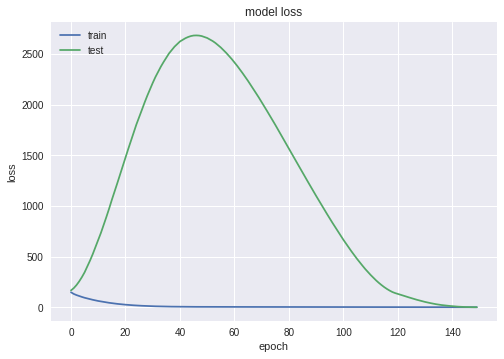

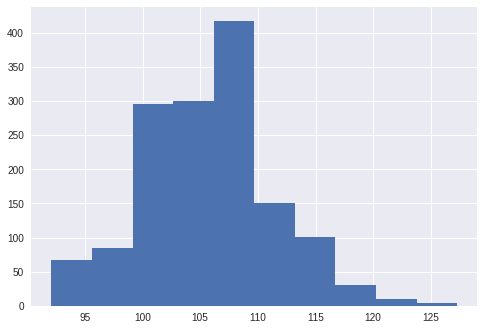

In [151]:
regularizer = l1(0.04)
optimize = Adam(lr=0.01)
printModelsWithParams(True, "mse")

Without Any Regularization OverFitting occurs as we see using Adam Optimizer.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_114 (Dense)            (None, 1)                 289       
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________
Train on 1095 samples, validate on 365 samples
Epoch 1/150
1095/1095 [==============================] - 4s 4ms/step - loss: 145.4846 - val_loss: 153.4391
Epoch 2/150
1095/1095 [==============================] - 0s 80us/step - loss: 137.0455 - val_loss: 161.3808
Epoch 3/150
1095/1095 [==============================] - 0s 76us/step - loss: 130.6883 - val_loss: 171.8684
Epoch 4/150
1095/1095 [==============================] - 0s 78us/step - loss: 124.8701 - val_loss: 184.3000
Epoch 5/150
1095/1095 [==============================] - 0s 79us/step - loss: 119.6096 - val_loss: 198.5821
Epoch 6/150
1095/1095 [==============================] - 0s 77us/step - loss: 114.3670

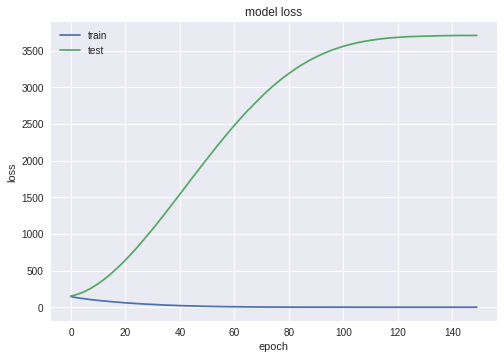

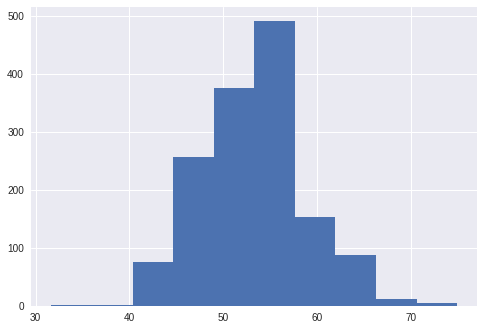

In [144]:
optimize = Adam(lr=0.005)
printModelsWithParams(False, "mse")

Without Any Regularization OverFitting occurs as we see using SGD Optimizer.

But SGD is better than Adam as Loss is decreasing as epochs increases.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_122 (Dense)            (None, 1)                 289       
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________
Train on 1095 samples, validate on 365 samples
Epoch 1/150
1095/1095 [==============================] - 5s 5ms/step - loss: 89.7336 - val_loss: 50.0290
Epoch 2/150
1095/1095 [==============================] - 0s 80us/step - loss: 20.4622 - val_loss: 20.8874
Epoch 3/150
1095/1095 [==============================] - 0s 80us/step - loss: 5.4139 - val_loss: 12.3808
Epoch 4/150
1095/1095 [==============================] - 0s 80us/step - loss: 1.7825 - val_loss: 9.1377
Epoch 5/150
1095/1095 [==============================] - 0s 79us/step - loss: 0.8838 - val_loss: 7.9691
Epoch 6/150
1095/1095 [==============================] - 0s 80us/step - loss: 0.5281 - val_loss: 7.16

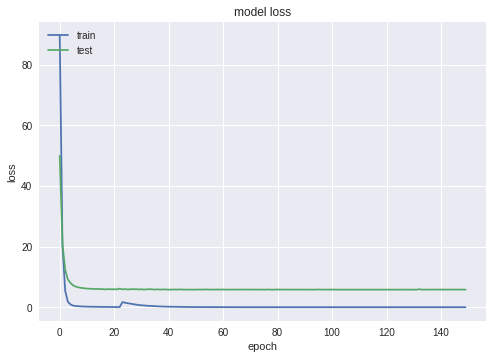

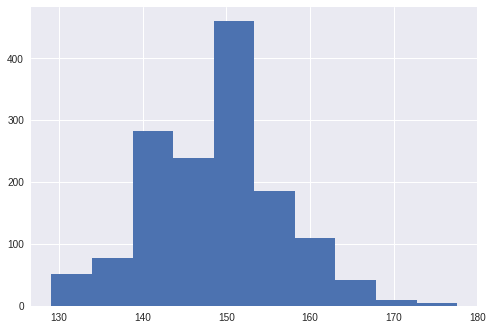

In [152]:
regularizer = l1(0.04)
optimize = SGD(lr=0.01)
printModelsWithParams(False, "mse")

The Best Result we got using SGD optimizer with Regularization L1 

**Loss: 0.0233 - Validation loss: 0.0276**

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_129 (Dense)            (None, 1)                 289       
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________
Train on 1095 samples, validate on 365 samples
Epoch 1/150
1095/1095 [==============================] - 7s 7ms/step - loss: 90.0408 - val_loss: 51.1196
Epoch 2/150
1095/1095 [==============================] - 0s 101us/step - loss: 20.8729 - val_loss: 20.4745
Epoch 3/150
1095/1095 [==============================] - 0s 97us/step - loss: 5.7861 - val_loss: 11.6879
Epoch 4/150
1095/1095 [==============================] - 0s 99us/step - loss: 2.0251 - val_loss: 8.5278
Epoch 5/150
1095/1095 [==============================] - 0s 100us/step - loss: 1.0348 - val_loss: 7.1538
Epoch 6/150
1095/1095 [==============================] - 0s 99us/step - loss: 0.6811 - val_loss: 6.

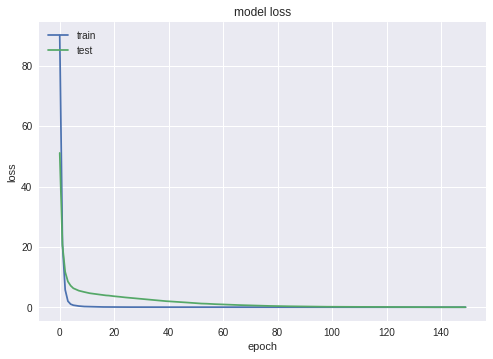

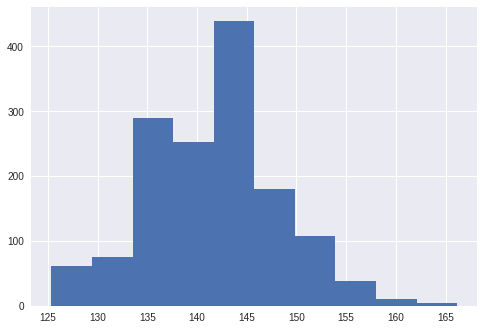

In [159]:
regularizer = l1(0.01)
optimize = SGD(lr=0.01)
printModelsWithParams(True, "mse")

Cheking using different Losses

MSE is the best trying on Adam and SGD other Losses

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_109 (Dense)            (None, 1)                 289       
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________
Train on 1095 samples, validate on 365 samples
Epoch 1/150
1095/1095 [==============================] - 5s 4ms/step - loss: 12.0397 - val_loss: 12.0215
Epoch 2/150
1095/1095 [==============================] - 0s 80us/step - loss: 11.9636 - val_loss: 12.0648
Epoch 3/150
1095/1095 [==============================] - 0s 81us/step - loss: 11.9058 - val_loss: 12.1044
Epoch 4/150
1095/1095 [==============================] - 0s 78us/step - loss: 11.8407 - val_loss: 12.1416
Epoch 5/150
1095/1095 [==============================] - 0s 78us/step - loss: 11.7834 - val_loss: 12.1850
Epoch 6/150
1095/1095 [==============================] - 0s 80us/step - loss: 11.7203 - val_loss

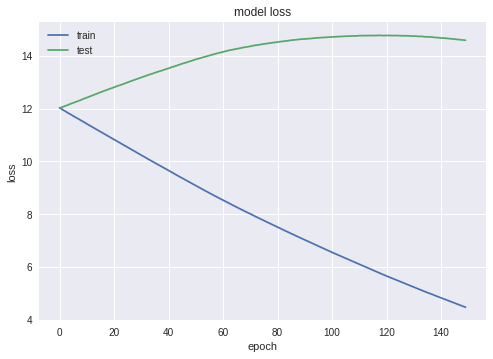

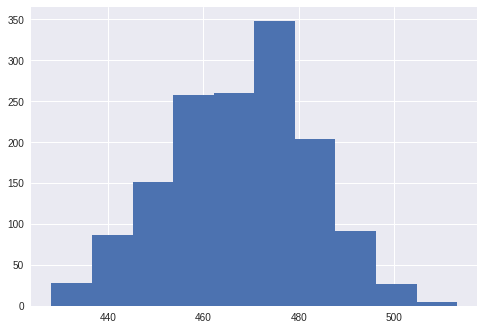

In [139]:
regularizer = l1(1)
optimize = "adam"
printModelsWithParams(False, "mae")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_110 (Dense)            (None, 1)                 289       
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________
Train on 1095 samples, validate on 365 samples
Epoch 1/150
1095/1095 [==============================] - 4s 4ms/step - loss: 99.9820 - val_loss: 100.1333
Epoch 2/150
1095/1095 [==============================] - 0s 80us/step - loss: 99.3821 - val_loss: 100.3704
Epoch 3/150
1095/1095 [==============================] - 0s 84us/step - loss: 98.8821 - val_loss: 100.7026
Epoch 4/150
1095/1095 [==============================] - 0s 79us/step - loss: 98.3784 - val_loss: 100.9713
Epoch 5/150
1095/1095 [==============================] - 0s 78us/step - loss: 97.8471 - val_loss: 101.2939
Epoch 6/150
1095/1095 [==============================] - 0s 81us/step - loss: 97.3414 - val

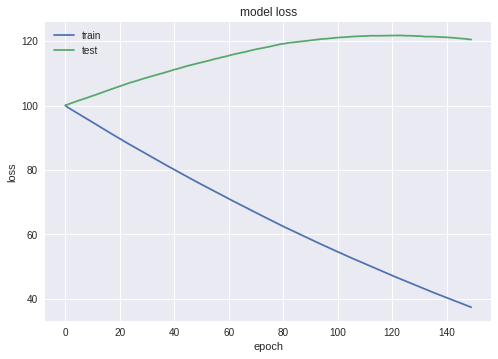

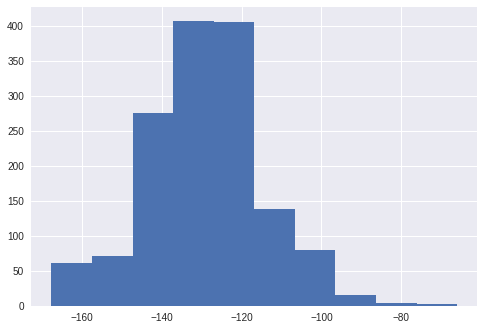

In [140]:
regularizer = l1(1)
optimize = "adam"
printModelsWithParams(False, "mape")

Summary:

- SGD is better than Adam in performance with regularization L1
- Both optimizers with no regularization will lead to an overfitting


In [5]:
train = pd.read_csv("housing_train.csv")
test = pd.read_csv("housing_test.csv")

all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))



train["SalePrice"] = np.log1p(train["SalePrice"])
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])
# artificial feature
all_data['OverallQualCond'] = all_data['OverallQual'] * all_data['OverallCond']

all_data = pd.get_dummies(all_data)

all_data = all_data.fillna(all_data.mean())
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

X_train = StandardScaler().fit_transform(X_train)

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y, random_state = 3)

model = Sequential()
model.add(Dense(1, input_dim=289, activation='linear',  kernel_initializer='normal'))
model.compile(loss = 'mse', optimizer = 'adam')
model.summary()
hist = model.fit(X_tr, y_tr, validation_data = (X_val, y_val), epochs = 150)
print(model.predict(X_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 290       
Total params: 290
Trainable params: 290
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Train on 1095 samples, validate on 365 samples
Epoch 1/150
1095/1095 [==============================] - 0s 157us/step - loss: 144.9950 - val_loss: 146.9087
Epoch 2/150
1095/1095 [==============================] - 0s 40us/step - loss: 143.1969 - val_loss: 148.0057
Epoch 3/150
1095/1095 [==============================] - 0s 37us/step - loss: 141.8067 - val_loss: 149.1945
Epoch 4/150
1095/1095 [==============================] - 0s 36us/step - loss: 140.4096 - val_loss: 150.4469
Epoch 5/150
1095/1095 [==============================] - 0s 37us/step - loss: 139.1267 - val_loss: 151.9582
Epoch 6/150
1095/1095 [==============================] - 0s 40us/step - loss: 137.7780 - val_loss: 153.3713
Epoch 7/150
1095/1095 [==============================] - 0s 40us/step - loss: 136.4765 - val_loss: 154.7945
Epoch 8/150
1095/1095 [==============================] - 0s 38us/step - loss: 135.2420 - val_loss: 156.4842
Epoch 9/150
1095/1095 [==============================] - 0s 37us/step - loss: 133.9880 -